In [1]:
# User can enter company name here

sym = 'NSE:LT'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import talib

In [4]:
def get_daily(self, symbol, outputsize='compact'):
        """ Return daily time series in two json objects as data and
        meta_data. It raises ValueError when problems arise
        Keyword Arguments:
            symbol:  the symbol for the equity we want to get its data
            outputsize:  The size of the call, supported values are
                'compact' and 'full; the first returns the last 100 points in the
                data series, and 'full' returns the full-length daily times
                series, commonly above 1MB (default 'compact')
        """
        _FUNCTION_KEY = "TIME_SERIES_DAILY"
        return _FUNCTION_KEY, 'Time Series (Daily)', 'Meta Data'

             1. open   2. high    3. low  4. close  5. volume
date                                                         
2020-06-05  940.0000  959.9000  936.6000  955.2500  6070000.0
2020-06-04  961.0500  968.0000  928.6000  930.7000  5355931.0
2020-06-03  955.9500  972.8500  955.0000  961.3000  4651554.0
2020-06-02  935.0000  953.0000  913.0500  945.4500  7325471.0
2020-06-01  944.6500  974.1500  924.0000  928.1500  7617144.0
...              ...       ...       ...       ...        ...
2002-07-05   39.8000   40.2222   39.8000   40.0222  1038928.0
2002-07-04   40.2444   40.3778   39.8356   39.9244  1515924.0
2002-07-03   40.6889   40.7556   40.0222   40.0800  1910772.0
2002-07-02   40.5556   40.9333   40.4444   40.5333  2500024.0
2002-07-01   40.1111   40.7244   40.1111   40.4356  3709080.0

[4427 rows x 5 columns]


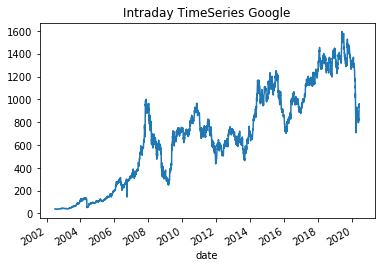

In [5]:
ts = TimeSeries(key='WYFT9V2S95N625AQ',output_format='pandas')
data, meta_data = ts.get_daily(symbol=sym,outputsize='full')
print(data)
data['4. close'].plot()
plt.title('Intraday TimeSeries Google')
plt.show()

In [6]:
data.to_csv("Aboli.csv")

In [7]:
data = pd.read_csv("Aboli.csv")

In [8]:
data

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-06-05,940.0000,959.9000,936.6000,955.2500,6070000.0
1,2020-06-04,961.0500,968.0000,928.6000,930.7000,5355931.0
2,2020-06-03,955.9500,972.8500,955.0000,961.3000,4651554.0
3,2020-06-02,935.0000,953.0000,913.0500,945.4500,7325471.0
4,2020-06-01,944.6500,974.1500,924.0000,928.1500,7617144.0
...,...,...,...,...,...,...
4422,2002-07-05,39.8000,40.2222,39.8000,40.0222,1038928.0
4423,2002-07-04,40.2444,40.3778,39.8356,39.9244,1515924.0
4424,2002-07-03,40.6889,40.7556,40.0222,40.0800,1910772.0
4425,2002-07-02,40.5556,40.9333,40.4444,40.5333,2500024.0


In [9]:
data['y'] =abs(data['1. open']-data['4. close'])
data['x']= abs(data['2. high'] - data['3. low'])

In [10]:
data['Label'] = data['x']
data

,date,1. open,2. high,3. low,4. close,5. volume,y,x,Label
0,2020-06-05,940.0000,959.9000,936.6000,955.2500,6070000.0,15.2500,23.3000,23.3000
1,2020-06-04,961.0500,968.0000,928.6000,930.7000,5355931.0,30.3500,39.4000,39.4000
2,2020-06-03,955.9500,972.8500,955.0000,961.3000,4651554.0,5.3500,17.8500,17.8500
3,2020-06-02,935.0000,953.0000,913.0500,945.4500,7325471.0,10.4500,39.9500,39.9500
4,2020-06-01,944.6500,974.1500,924.0000,928.1500,7617144.0,16.5000,50.1500,50.1500
...,...,...,...,...,...,...,...,...,...
4422,2002-07-05,39.8000,40.2222,39.8000,40.0222,1038928.0,0.2222,0.4222,0.4222
4423,2002-07-04,40.2444,40.3778,39.8356,39.9244,1515924.0,0.3200,0.5422,0.5422
4424,2002-07-03,40.6889,40.7556,40.0222,40.0800,1910772.0,0.6089,0.7334,0.7334
4425,2002-07-02,40.5556,40.9333,40.4444,40.5333,2500024.0,0.0223,0.4889,0.4889


In [11]:
data.loc[data.y <= (data.x/2), "Label"] = 1 #1 means unstable
data.loc[data.y > (data.x/2), "Label"] = 0 # 0 means stable

In [12]:
data

,date,1. open,2. high,3. low,4. close,5. volume,y,x,Label
0,2020-06-05,940.0000,959.9000,936.6000,955.2500,6070000.0,15.2500,23.3000,0.0
1,2020-06-04,961.0500,968.0000,928.6000,930.7000,5355931.0,30.3500,39.4000,0.0
2,2020-06-03,955.9500,972.8500,955.0000,961.3000,4651554.0,5.3500,17.8500,1.0
3,2020-06-02,935.0000,953.0000,913.0500,945.4500,7325471.0,10.4500,39.9500,1.0
4,2020-06-01,944.6500,974.1500,924.0000,928.1500,7617144.0,16.5000,50.1500,1.0
...,...,...,...,...,...,...,...,...,...
4422,2002-07-05,39.8000,40.2222,39.8000,40.0222,1038928.0,0.2222,0.4222,0.0
4423,2002-07-04,40.2444,40.3778,39.8356,39.9244,1515924.0,0.3200,0.5422,0.0
4424,2002-07-03,40.6889,40.7556,40.0222,40.0800,1910772.0,0.6089,0.7334,0.0
4425,2002-07-02,40.5556,40.9333,40.4444,40.5333,2500024.0,0.0223,0.4889,1.0


In [13]:
data.to_csv("stability.csv")